Cell 1: Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
import matplotlib.pyplot as plt

Cell 2: Loading and Preprocessing Data

In [3]:
# MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Data Loading
x_train, x_test = x_train/255.0, x_test/255.0  # Normalizing the data


Cell 3: Plotting an Example

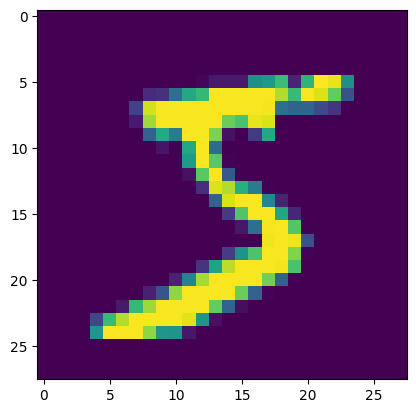

In [5]:
# Plotting an example
plt.imshow(x_train[0])
plt.show()


Cell 4: Preparing the Model

In [7]:

# Preparing the model
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(120, activation="relu"),
    Dropout(0.2),
    Dense(10)
])

Cell 5: Making Predictions

In [9]:
# Making predictions
predictions = model(x_train[:1]).numpy()
print(predictions)


[[ 1.1786855   0.26671478 -0.12526876 -0.29031152  0.14928365  0.3053041
  -0.12904721  0.21316722  0.2007462  -0.32180214]]


Cell 6: Applying Softmax

In [11]:
# Applying softmax
print(tf.nn.softmax(predictions).numpy())


[[0.2545548  0.10226274 0.06910048 0.05858737 0.09093221 0.10628612
  0.06883989 0.09693085 0.09573432 0.05677116]]


Cell 7: Defining Loss Function

In [13]:
# Loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


Cell 8: Compiling the Model

In [15]:
# Compiling the model
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


Cell 9: Training the Model

In [17]:
# Training the model
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.9149 - loss: 0.2955
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9569 - loss: 0.1451
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9672 - loss: 0.1090
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 22ms/step - accuracy: 0.9726 - loss: 0.0900
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9759 - loss: 0.0759


Cell 10: Evaluating the Model

In [19]:
# Evaluating the model
model.evaluate(x_test, y_test, verbose=2)


313/313 - 6s - 19ms/step - accuracy: 0.9779 - loss: 0.0728


[0.07280721515417099, 0.9779000282287598]

Cell 11: Validation of Model and Plotting Accuracy

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9832 - loss: 0.0534 - val_accuracy: 0.9811 - val_loss: 0.0650
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9857 - loss: 0.0481 - val_accuracy: 0.9807 - val_loss: 0.0650
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.9849 - loss: 0.0481 - val_accuracy: 0.9817 - val_loss: 0.0632
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9862 - loss: 0.0454 - val_accuracy: 0.9814 - val_loss: 0.0637
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9865 - loss: 0.0438 - val_accuracy: 0.9818 - val_loss: 0.0619


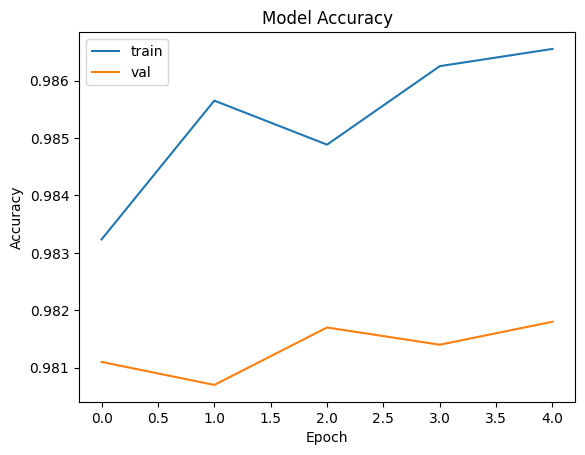

In [21]:
# Validation of Model
val = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=300)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(val.history["accuracy"])
plt.plot(val.history["val_accuracy"])
plt.legend(["train", "val"])
plt.show()
